<a href="https://colab.research.google.com/github/sumeet022/SmallCapStocks/blob/main/SmallCapStocks_Nse_lastPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import os
import glob
import pandas as pd
import re
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
end_date = datetime.now()
start_date = end_date - timedelta(days=7)
# !pip install datasets transformers
n = pd.read_csv(r"/content/NseLargeDeals")
ClientSheet = pd.read_csv(r"/content/ClientNames.csv")
n['date'] = pd.to_datetime(n['date'], format='%d-%b-%Y')
n['date'] = n['date'].apply(lambda x: x.strftime('%d-%m-%Y'))
n['date']=n['date'].apply(lambda x:x.replace('-','/'))
n = n.drop_duplicates()
new_column_names = {
    'deal Date': 'date',
    'security NAME':'security_name',
    'buY/SELL': 'type',
    'quantity TRADED':'quantity',
    'trade PRICE/ WEIGHTED. AVG. PRICE':'price',
    'client NAME':'client_name'
    # Add more mappings as needed
}

# Use the rename() method to rename columns
n = n.rename(columns=new_column_names)
####
nse = n.iloc[:,[0,2,3,4,5,6]]
nse.info()
nse['price'] = nse['price'].apply(lambda x: re.sub(r'[^\d.]', '', x))
nse['price'] = nse['price'].astype(float)
# This part is to filter out unique elements where the people only brought and sold the shares not on the same day

filtered_df = nse[~nse.groupby(['date', 'client_name'])['type'].transform(lambda x: x.nunique() == 2)]
# Now, filter out rows for each client where they bought and sold on the same day
result_df = filtered_df.groupby(['date','client_name']).filter(lambda x: len(x) < 2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1558 non-null   object
 1   security_name  1558 non-null   object
 2   client_name    1558 non-null   object
 3   type           1558 non-null   object
 4   quantity       1558 non-null   object
 5   price          1558 non-null   object
dtypes: object(6)
memory usage: 85.2+ KB


<ipython-input-1-b6c5ce4e62e0>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nse['price'] = nse['price'].apply(lambda x: re.sub(r'[^\d.]', '', x))
<ipython-input-1-b6c5ce4e62e0>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nse['price'] = nse['price'].astype(float)


In [2]:
LessThan10_GreaterThan5 = result_df[(result_df['price'] > 5) & (result_df['price'] < 10)]
LessThan5_GreaterThan4 = result_df[(result_df['price'] < 5) & (result_df['price'] > 4)]
LessThan4_GreaterThan3 = result_df[(result_df['price'] < 4) & (result_df['price'] > 3)]
LessThan3_GreaterThan2 = result_df[(result_df['price'] < 3) & (result_df['price'] > 2)]
LessThan2 = result_df[(result_df['price'] < 2)]
LessThan20_GreaterThan10 = result_df[(result_df['price'] > 10) & (result_df['price'] < 20)]
LessThan30_GreaterThan20 = result_df[(result_df['price'] > 20) & (result_df['price'] < 30)]
GreaterThan30 = result_df[(result_df['price'] > 30)]
result_df['date'] = pd.to_datetime(result_df['date'])
LessThan10_GreaterThan5_1week = result_df[(result_df['price'] > 5) & (result_df['price'] < 10) & (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan5_GreaterThan4_1week = result_df[(result_df['price'] < 5) & (result_df['price'] > 4) & (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan4_GreaterThan3_1week = result_df[(result_df['price'] < 4) & (result_df['price'] > 3)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan3_GreaterThan2_1week = result_df[(result_df['price'] < 3) & (result_df['price'] > 2)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan2_1week = result_df[(result_df['price'] < 2)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan20_GreaterThan10_1week = result_df[(result_df['price'] > 10) & (result_df['price'] < 20)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
LessThan30_GreaterThan20_1week = result_df[(result_df['price'] > 20) & (result_df['price'] < 30)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]
GreaterThan30_1week = result_df[(result_df['price'] > 30)& (result_df['date'] >= start_date) & (result_df['date'] <= end_date)]

<ipython-input-2-ce8a1e808727>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  result_df['date'] = pd.to_datetime(result_df['date'])


In [3]:
LessThan2_1week


,date,security_name,client_name,type,quantity,price
1403,2024-03-22,Siti Networks Limited,L&T FINANCE HOLDINGS LIMITED,SELL,"60,00,000",0.60
1412,2024-03-26,Antarctica Graphics Ltd,RENU KUTHARI,SELL,"8,16,947",1.50
1480,2024-03-27,CMM Infraprojects Limited,CHAMPAK AMRATLAL SHAH HUF,SELL,"1,02,000",1.65
1483,2024-03-27,CMM Infraprojects Limited,RIYA RONIT SHAH,BUY,"1,95,000",1.65
1484,2024-03-27,CMM Infraprojects Limited,SAMTA MUNDRA,SELL,"93,000",1.65


In [4]:
LessThan3_GreaterThan2_1week


,date,security_name,client_name,type,quantity,price
1331,2024-03-22,Akshar Spintex Limited,MAHADEV MANUBHAI MAKVANA,SELL,"21,01,720",2.5


In [5]:
LessThan4_GreaterThan3_1week


,date,security_name,client_name,type,quantity,price
1550,2024-03-27,Viji Finance Limited,VIJAY KOTHARI,BUY,"11,86,142",3.32


In [6]:
LessThan5_GreaterThan4_1week


,date,security_name,client_name,type,quantity,price
1420,2024-03-26,Jalan Transolu. India Ltd,ARCHANA CHAWLA,SELL,"1,05,000",4.85


In [7]:
LessThan10_GreaterThan5_1week


,date,security_name,client_name,type,quantity,price
1419,2024-03-26,Hindustan Construction Co,RAKESH RAJKRISHAN AGARWAL,BUY,"11,07,723",9.00
1467,2024-03-26,Suumaya Industries Ltd,AMISHA SANJAY SHAH,SELL,"3,33,586",7.13
1494,2024-03-27,Hindustan Construction Co,ISHARES CORE MSCI EMERGING MARKETS ETF,SELL,"11,31,878",9.45
1495,2024-03-27,Hindustan Construction Co,PASHUPATI CAPITA SER PVT LTD,BUY,"11,50,000",9.49


In [8]:
LessThan20_GreaterThan10_1week


,date,security_name,client_name,type,quantity,price
1334,2024-03-22,Atal Realtech Limited,YELLOWSTONE VENTURES LLP,SELL,"5,00,000",15.90
1389,2024-03-22,Rama Steel Tubes Limited,L7 HITECH PRIVATE LIMITED,SELL,"38,00,000",13.25
1461,2024-03-26,SecUR Credentials Limited,JAINAM BROKING LIMITED,SELL,"3,00,528",17.62
1462,2024-03-26,SecUR Credentials Limited,JALIYAN COMMODITY,BUY,"3,00,528",17.62
1472,2024-03-27,Astron Paper Bord Mil Ltd,NAKSHATRA CORPORATE ADVISORS LIMITED,SELL,"2,36,000",19.50
1551,2024-03-27,Vilin Bio Med Limited,K MURALIDHAR REDDY,SELL,"1,00,000",18.74


In [9]:
LessThan30_GreaterThan20_1week

,date,security_name,client_name,type,quantity,price
1374,2024-03-22,Onelife Cap Advisors Ltd,JR SEAMLESS PRIVATE LIMITED,SELL,"1,00,000",20.85
1382,2024-03-22,Patel Integrated Logistic,VALSALAN RAJINDRA,SELL,"3,61,483",20.91
1396,2024-03-22,Sadbhav Engineering Limit,STCI FINANCE LIMITED,SELL,"17,06,775",27.98
1425,2024-03-26,Marshall Machines Ltd,RASMIKANT VALJIBHAI POPAT,BUY,"2,75,000",25.90
1426,2024-03-26,Marshall Machines Ltd,VISHAL ATHA,SELL,"2,75,000",25.90
1433,2024-03-26,Onelife Cap Advisors Ltd,ANBUPAUL,BUY,"1,29,500",23.96
1436,2024-03-26,Onelife Cap Advisors Ltd,MAYANK AGRAWAL,BUY,"76,500",25.00
1460,2024-03-26,Sadbhav Engineering Limit,STCI FINANCE LIMITED,SELL,"10,00,000",25.68
1465,2024-03-26,Spacenet Enters Ind Ltd,SUVI RUBBER PVT LTD,SELL,"29,83,881",25.90
1501,2024-03-27,Laxmi Cotspin Limited,DINESH KANTILAL RATHI,BUY,"90,500",27.30


In [12]:
 GreaterThan30_1week

,date,security_name,client_name,type,quantity,price
1335,2024-03-22,D B Realty Limited,PINNACLE INVESTMENTS,SELL,"30,00,000",205.37
1336,2024-03-22,Deep Industries Limited,MORNING STAR PRIVATE TRUST,SELL,"3,32,375",261.50
1341,2024-03-22,Enser Communications Ltd,B N RATHI SECURITIES LTD,SELL,"1,00,000",70.00
1342,2024-03-22,Enser Communications Ltd,SANDEEP KUMAR,BUY,"70,000",71.26
1343,2024-03-22,Enser Communications Ltd,SAROJ GUPTA,BUY,"1,74,000",72.00
...,...,...,...,...,...,...
1555,2024-03-27,Wise Travel India Limited,SAKET AGARWAL,BUY,"1,94,000",190.00
1556,2024-03-27,Wise Travel India Limited,SAKET AGRAWAL,BUY,"1,85,000",190.00
1557,2024-03-27,Zee Entertain. Enterp.Ltd,PPFAS MUTUAL FUND - PARAG PARIKH LONG TERM VAL...,BUY,"62,22,000",141.44
1558,2024-03-27,Zim Laboratories Limited,MATHEW CYRIAC,SELL,"3,51,860",96.10


In [13]:
TruestedNames = result_df[result_df['client_name'].isin(ClientSheet['Client_Name'])]
TruestedNames

,date,security_name,client_name,type,quantity,price
154,2024-02-23,Tijaria Polypipes Ltd,STATSOL RESEARCH LLP,BUY,"1,99,436",9.10
234,2024-02-26,Sundaram Multi Pap Ltd,F3 ADVISORS PRIVATE LIMITED,SELL,"32,49,000",3.51
423,2024-02-29,Tijaria Polypipes Ltd,F3 ADVISORS PRIVATE LIMITED,BUY,"1,50,000",11.00
424,2024-02-29,Tijaria Polypipes Ltd,THUNDERSTRIKE QUANT RESEARCH LLP,BUY,"1,90,000",11.00
897,2024-12-03,Tijaria Polypipes Ltd,MULTIPLIER SHARE & STOCK ADVISORS PRIVATE LIMITED,BUY,"4,00,000",15.00
966,2024-03-13,Tijaria Polypipes Ltd,MULTIPLIER SHARE & STOCK ADVISORS PRIVATE LIMITED,SELL,"2,22,471",15.30
1216,2024-03-20,Sarveshwar Foods Limited,MULTIPLIER SHARE & STOCK ADVISORS PRIVATE LIMITED,BUY,"55,00,000",8.90


In [15]:
result_df['date'] = pd.to_datetime(result_df['date'])
one_month_ago = datetime.now() - timedelta(days=30)  # Assuming 30 days as a month
df_last_month = result_df[result_df['date'] >= one_month_ago]
security_counts = df_last_month['security_name'].value_counts()
with_price = df_last_month[['security_name','type','price']]

In [16]:
result_df['date'] = pd.to_datetime(result_df['date'])
one_month_ago = datetime.now() - timedelta(days=45)
df_last_month = result_df[result_df['date'] >= one_month_ago]
security_counts = df_last_month['security_name'].value_counts()
with_price = df_last_month[['security_name','type','price']]
top_10_security = security_counts.head(10)
security_counts

Kalahridhaan Trendz Ltd      19
CMM Infraprojects Limited    15
V R Infraspace Limited       11
Lords Chloro Alkali Ltd      10
Tijaria Polypipes Ltd         9
                             ..
Dish TV India Limited         1
Vasa Retail & Oversea Ltd     1
Nitco Limited                 1
S J Logistics (India) Ltd     1
Ahlada Engineers Limited      1
Name: security_name, Length: 216, dtype: int64

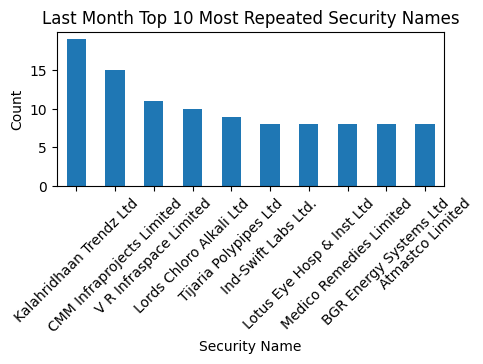

In [17]:
plt.figure(figsize=(5, 2))
top_10_security.plot(kind='bar')
plt.title('Last Month Top 10 Most Repeated Security Names')
plt.xlabel('Security Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
top_10_df = df_last_month[df_last_month['security_name'].isin(top_10_security.index)]
pivot_df = top_10_df.pivot_table(index='security_name', columns='type', aggfunc='size', fill_value=0)
fig = px.bar(pivot_df, x=pivot_df.index, y=pivot_df.columns,barmode='group', title='Top 10 Most Repeated Security Names with Types Count')
fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [20]:
import yfinance as yf
ticker_symbol = 'ZENITHSTL.ns'

# Fetch historical data
stock_data = yf.download(ticker_symbol, period='1d')

# Extract the end-of-day share price
end_of_day_price = stock_data['Close'].iloc[-1]

print("End-of-day share price of", ticker_symbol, "is:", end_of_day_price)

[*********************100%%**********************]  1 of 1 completed

End-of-day share price of ZENITHSTL.ns is: 7.5


In [ ]:
#for nse its sundaram.ns
#for bse its sundaram.bo

In [55]:
sme_equity_df = pd.read_csv('sme_equity.csv')
equity_df = pd.read_csv('equity.csv')

df_sme = sme_equity_df.iloc[:, :-6]
df_equity = equity_df.iloc[:, :-6]
new_column_names = {
    'NAME_OF_COMPANY': 'NAME OF COMPANY'
}
df_sme = df_sme.rename(columns=new_column_names)
df_merge = pd.concat([df_sme, df_equity], axis=0)

In [61]:
def get_security_code(security_name):
    result = df_merge.loc[df_merge['NAME OF COMPANY'] == security_name, 'SYMBOL']
    if not result.empty:
        return result.iloc[0]
    else:
        return 'Security code not found'

def add_ns_suffix(value):
    return value + ".ns"

result_df['New code'] = result_df['security_name'].apply(get_security_code)
result_df['New code'] = result_df['New code'].apply(add_ns_suffix)

,SYMBOL,NAME OF COMPANY
0,20MICRONS,20 Microns Limited
1,21STCENMGM,21st Century Management Services Limited
2,360ONE,360 ONE WAM LIMITED
3,3IINFOLTD,3i Infotech Limited
4,3MINDIA,3M India Limited
...,...,...
1961,ZOTA,Zota Health Care LImited
1962,ZUARI,Zuari Agro Chemicals Limited
1963,ZUARIIND,ZUARI INDUSTRIES LIMITED
1964,ZYDUSLIFE,Zydus Lifesciences Limited


In [76]:
def fetch_end_of_day_price(ticker_symbol):
    try:
        stock_data = yf.download(ticker_symbol, period='1d')
        end_of_day_price = stock_data['Close'].iloc[-1]
        return end_of_day_price
    except Exception as e:
        print(f"Error fetching data for {ticker_symbol}: {e}")
        return None

# Add an additional column 'last_price' and fetch end-of-day prices
result_df['last_price'] = result_df['New code'].apply(fetch_end_of_day_price)

In [68]:
result_df_1=result_df

In [76]:
result_df

,date,security_name,client_name,type,quantity,price,New code,last_price
0,2024-02-23,Ahlada Engineers Limited,K I VARAPRASAD REDDY,SELL,"68,407",124.64,AHLADA.ns,109.449997
1,2024-02-23,Ami Organics Limited,SAGEONE INVESTMENT ADVISORS LLP,BUY,"2,50,000",1075.00,AMIORG.ns,1093.699951
3,2024-02-23,Atmastco Limited,ASNANI STOCK BROKER PRIVATE LIMITED - ERROR AC...,SELL,"3,08,800",95.55,ATMASTCO.ns,NaN
4,2024-02-23,Atmastco Limited,HEMANT KADVABHAI BHOOT,BUY,"1,82,400",91.48,ATMASTCO.ns,NaN
5,2024-02-23,Atmastco Limited,ROHAN GUPTA,BUY,"2,86,400",91.25,ATMASTCO.ns,NaN
...,...,...,...,...,...,...,...,...
1555,2024-03-27,Wise Travel India Limited,SAKET AGARWAL,BUY,"1,94,000",190.00,WTICAB.ns,NaN
1556,2024-03-27,Wise Travel India Limited,SAKET AGRAWAL,BUY,"1,85,000",190.00,WTICAB.ns,NaN
1557,2024-03-27,Zee Entertain. Enterp.Ltd,PPFAS MUTUAL FUND - PARAG PARIKH LONG TERM VAL...,BUY,"62,22,000",141.44,Security code not found.ns,NaN
1558,2024-03-27,Zim Laboratories Limited,MATHEW CYRIAC,SELL,"3,51,860",96.10,ZIMLAB.ns,94.949997


In [77]:
result_df = result_df[result_df['last_price']>result_df['price']]
result_df

,date,security_name,client_name,type,quantity,price,New code,last_price
1,2024-02-23,Ami Organics Limited,SAGEONE INVESTMENT ADVISORS LLP,BUY,"2,50,000",1075.00,AMIORG.ns,1093.699951
296,2024-02-28,Juniper Hotels Limited,NORGES BANK ON ACCOUNT OF THE GOVERNMENT PENSI...,BUY,"21,77,724",398.15,JUNIPER.ns,517.549988
343,2024-02-29,CMS Info Systems Limited,ELIMATH ADVISORS PRIVATE LIMITED,BUY,"8,50,000",378.82,CMSINFO.ns,390.649994
503,2024-01-03,Skipper Limited,INTER GLOBE FINANCE LIMITED,BUY,"74,876",186.57,SKIPPER.ns,323.399994
509,2024-01-03,Viji Finance Limited,VIJAY KOTHARI,BUY,"4,36,492",2.96,VIJIFIN.ns,3.300000
...,...,...,...,...,...,...,...,...
1466,2024-03-26,Spencer's Retail Limited,K B G CONSULTANTS PVT LTD,SELL,"6,50,000",88.35,SPENCERS.ns,91.300003
1502,2024-03-27,Laxmi Cotspin Limited,SAFFORD MERCANTILE PVTLTD,SELL,"90,500",26.69,LAXMICOT.ns,26.700001
1531,2024-03-27,Samhi Hotels Limited,BLUE CHANDRA PTE. LTD,SELL,"1,01,73,756",206.10,SAMHI.ns,211.399994
1532,2024-03-27,Samhi Hotels Limited,SOCIETE GENERALE,BUY,"11,51,677",206.10,SAMHI.ns,211.399994
